## Práctica en aula: Grafos de De bruijn

In [1]:
from de_bruijn_algorithm.create.create_graph import CreateGraph
from de_bruijn_algorithm.build.build_graph import BuildGraph

c:\Users\Susana\anaconda3\envs\bio\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


### 1. Definición de los k-mers

In [2]:
kmers = ["AGTT", "GTTG", "TTGA", "TGAC", "GACG", "ACGA", "CGAA", "GAAC", "AACG"]
#kmers = ["ACG", "CGT", "GTG", "TGA", "GAC"]
kmers = ["GAC", "ACG", "CGT", "CTT", "TTA", "TAC", "ACT", "CTA", "TAT", "ATG", "TGT", "GTG"]

## 2. Creación de los prefijos y sufijos y construcción del grafo

In [3]:
graph = CreateGraph().create_graph(kmers)

## 3. Conversión del grafo a un objeto de NetworkX

In [4]:
#graph_builder = BuildGraph().initialize_builder('IGraph')
graph_builder = BuildGraph().initialize_builder('NetworkxGraph')
graph_builder.build_graph(graph)

## 4. Visualización del grafo

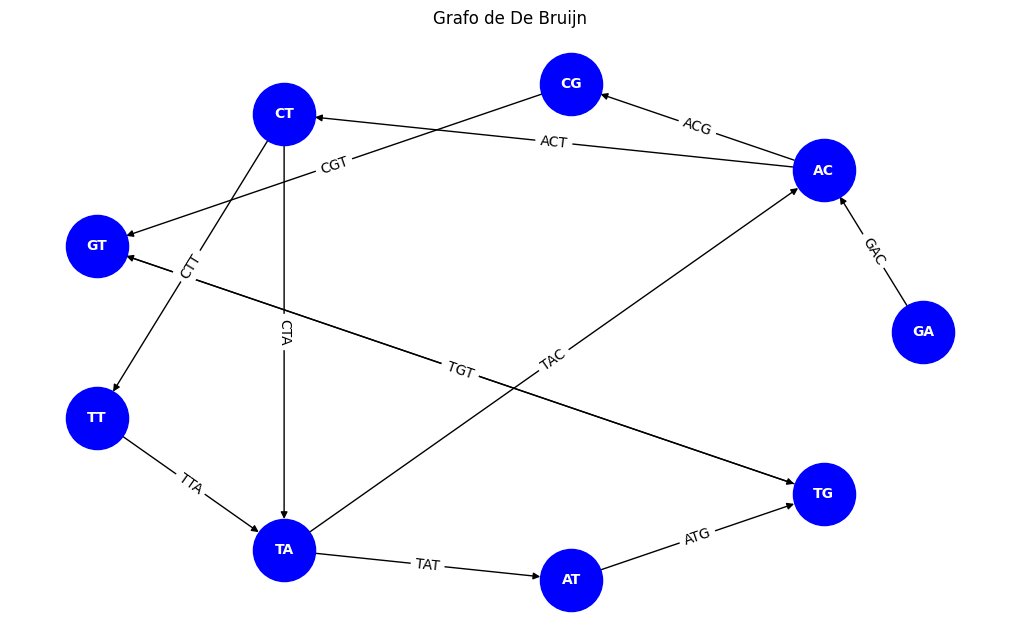

In [5]:
graph_builder.draw_graph()

## 5. Construcción del camino Euleriano

In [6]:
eulerian_path = graph_builder.get_eulerian_paths()
cycle_conditions, path_conditions = graph_builder.get_conditions()
print(eulerian_path)
print(cycle_conditions)
print(path_conditions)

Camino Euleriano 1: GA -> AC -> CT -> TT -> TA -> AT -> TG -> GT
Camino Euleriano 2: GA -> AC -> CT -> TT -> TA -> AT -> TG
Camino Euleriano 3: CT -> TT -> TA -> AC -> CG -> GT
Camino Euleriano 4: CT -> TT -> TA -> AC -> CG -> GT -> TG
No es un ciclo euleriano porque: 
 El nodo GA tiene 0 aristas de entrada y 1 aristas de salida. 
 El nodo CT tiene 1 aristas de entrada y 2 aristas de salida. 
 El nodo GT tiene 2 aristas de entrada y 1 aristas de salida. 
 El nodo TG tiene 2 aristas de entrada y 1 aristas de salida. 
 El grafo no es fuertemente conexo.
El grafo tiene múltiples caminos entre los nodos.


## 6. Visualización del camino Euleriano

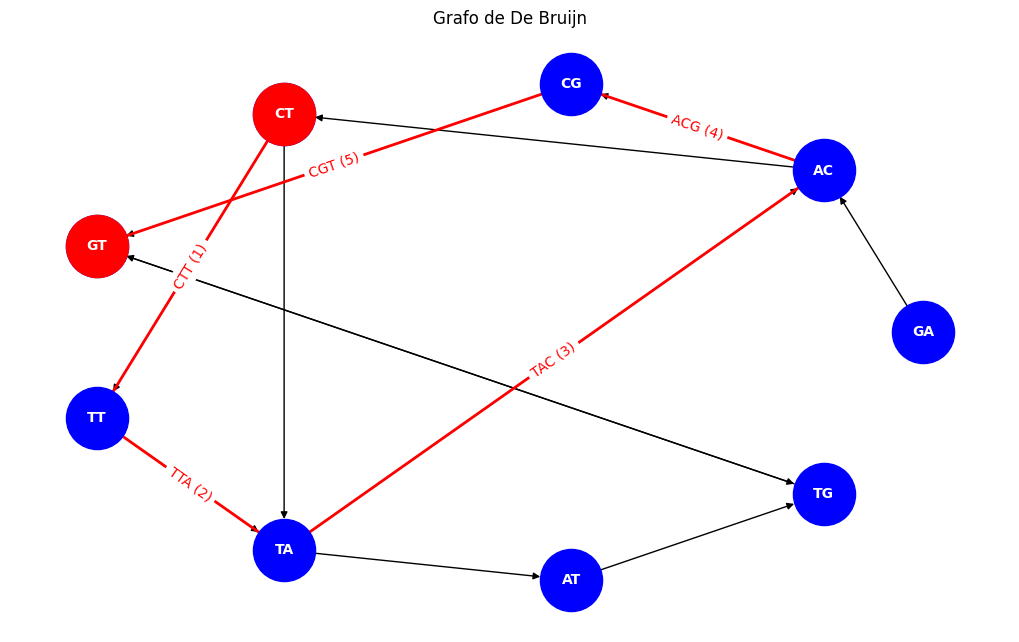

In [7]:
graph_builder.draw_graph(draw_eulerian=True)

## 7. Reconstrucción de la secuencia original

In [8]:
dna = graph_builder.assemble_sequence(kmers)
kmers = ["GAC", "ACG", "CGT", "CTT", "TTA", "TAC", "ACT", "CTA", "TAT", "ATG", "TGT", "GTG"]


In [9]:
print(kmers)

['GAC', 'ACG', 'CGT', 'CTT', 'TTA', 'TAC', 'ACT', 'CTA', 'TAT', 'ATG', 'TGT', 'GTG']


In [10]:
print(dna)

Possible sequence: GACTTATGTG-CTACG-TACGT
